In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q supervision

In [ ]:
!wget https://github.com/moured/YOLOv10-Document-Layout-Analysis/releases/download/doclaynet_weights/yolov10x_best.pt
!wget https://raw.githubusercontent.com/moured/YOLOv10-Document-Layout-Analysis/main/images/input_sample.png

In [ ]:
import cv2
import supervision as sv # pip install supervision
from ultralytics import YOLOv10

In [ ]:
# modify the path to model's weights.

model = YOLOv10('yolov10x_best.pt')
image = cv2.imread('input_sample.png')

results = model(source='input_sample.png', conf=0.2, iou=0.8)[0]

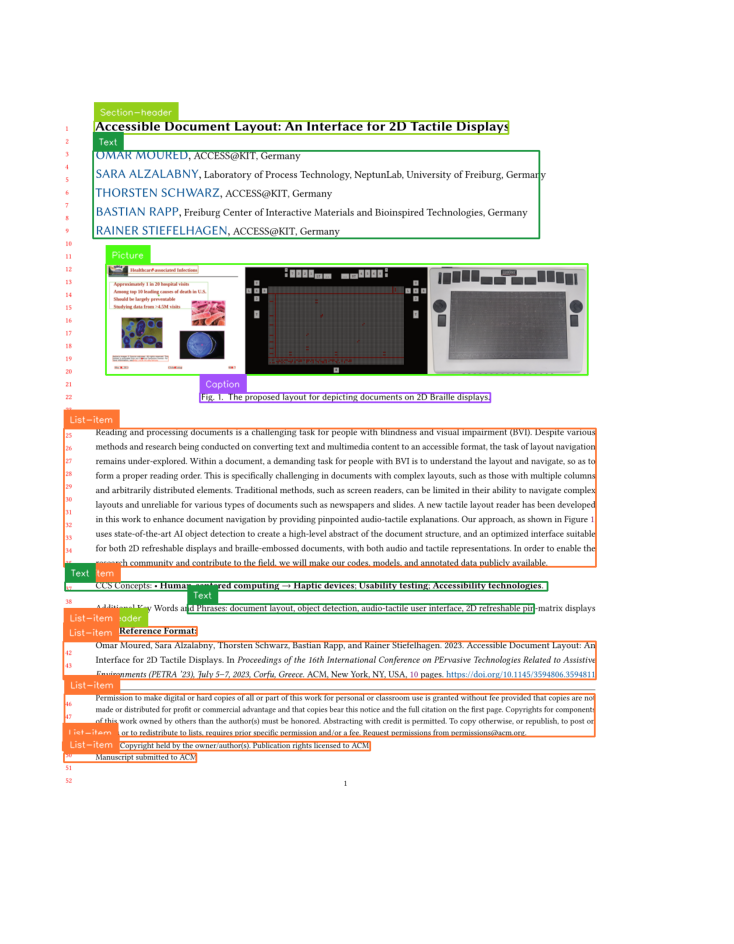

In [8]:
# show results with "supervision" library

detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)